# House Price Prediction

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from model_utils import report, cv_scores

from catboost import CatBoostRegressor

## Data Preprecessing

### Importing the dataset

In [ ]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

### Splitting the dataset into the Training set and Test set 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

## Training the CatBoost model

### Grid Search

In [ ]:
'''
param = {'depth': np.arange(3, 8),
        'learning_rate': [0.03,0.001,0.01,0.1,0.2,0.3],
        'l2_leaf_reg':[3,1,5,10,100],
        'border_count':[32,5,10,20,50,100,200],
        'iterations': [1000]}
'''

param = {'iterations': [2000],
         'depth': np.arange(3, 10),
         'loss_function': ['RMSE', 'MAE'],
         'border_count':[16, 32, 64],
         'l2_leaf_reg': [3, 6, 12]}

gs = GridSearchCV(CatBoostRegressor(random_state=0, verbose=0), param_grid=param, scoring='r2', cv = 2)
gs.fit(X_train_sc, y_train_sc.ravel())

model = gs.best_estimator_
print(gs.best_params_)

{'border_count': 64, 'depth': 6, 'iterations': 2000, 'l2_leaf_reg': 3, 'loss_function': 'RMSE'}


### Cross Validation (R-Squared)

,Scores
Split 1,0.90957
Split 2,0.93407
Split 3,0.87507
Split 4,0.94595
Split 5,0.88275
Split 6,0.92512
Split 7,0.91238
Split 8,0.93417
Split 9,0.91867
Split 10,0.93347


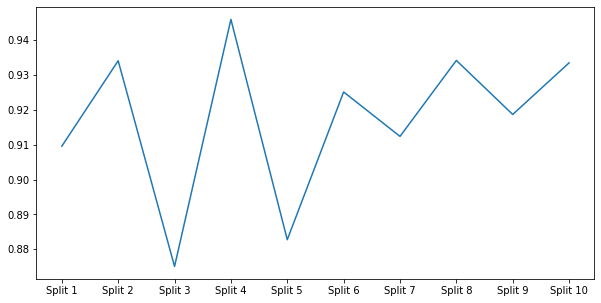

In [ ]:
cv_scores(model, X_train_sc, y_train_sc)

### Testing data

,Value
Metric,
R2 Score,0.929133
MAE,42669.890923
RMSE,55728.831378


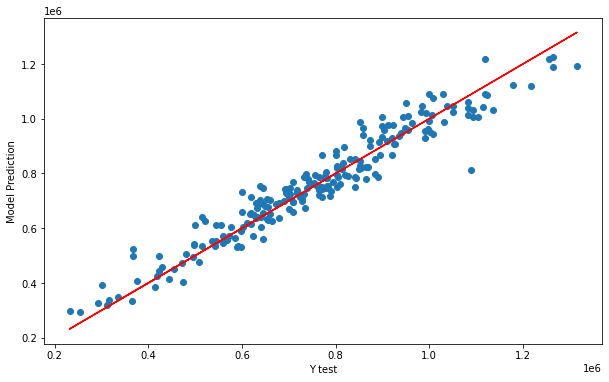

In [ ]:
y_pred = model.predict(X_test_sc)

report(y_test, sc_y.inverse_transform(y_pred))